In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import json
import os

In [67]:
test_sample = Image.open("./03.Sample_Data/1.Raw_data/3.어플리케이션/C_20220715_000000.jpg")

In [68]:
test_sample = np.array(test_sample)
test_sample.shape

(3024, 4032, 3)

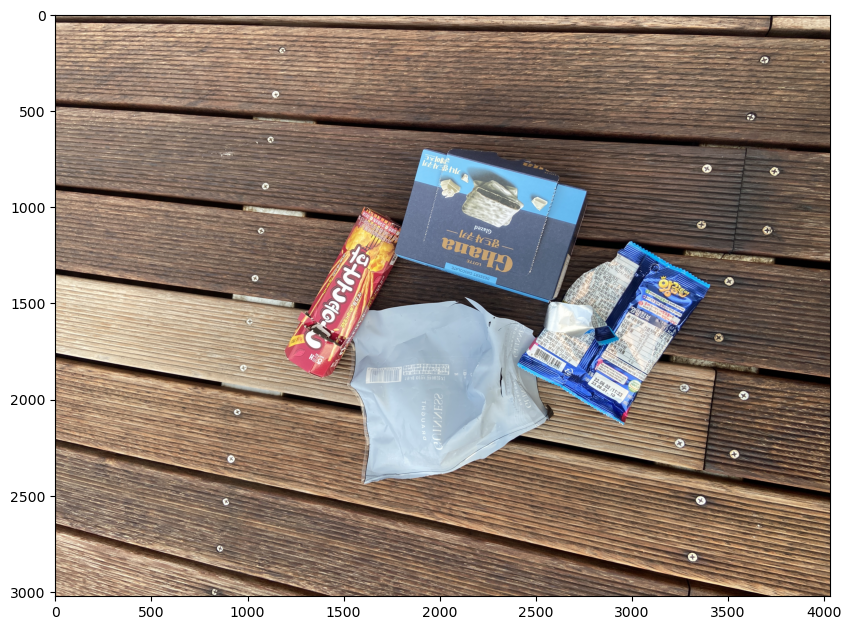

In [69]:
plt.figure(figsize=(10, 12))
plt.imshow(test_sample);

In [70]:
image_reshape = (254, 254)
test_picture = cv2.imread("./C_20220715_000000.jpg", cv2.IMREAD_COLOR) # cv2의 경우 경로에 한글이 있으면 에러 발생함

In [71]:
print("img.shape = {0}".format(test_picture.shape))

img.shape = (4032, 3024, 3)


In [72]:
test_picture = cv2.resize(test_picture, image_reshape)
print("img.shape = {0}".format(test_picture.shape))

img.shape = (254, 254, 3)


In [73]:
cv2.imwrite("./test_picture.jpg", test_picture)

True

In [74]:
file_path = "./03.Sample_Data/2.Label_data/3.Application/C_20220715_000000.json"
with open(file_path, encoding='utf-8') as f:
    data = json.load(f)
    print(data)

{'objects': [{'id': 'aa4b7dab-f813-45c7-9402-d6a68d96dd6c', 'class_id': '80aee1fe-f6ff-4e3b-987f-b7105eccd708', 'tracking_id': 1, 'class_name': 'c_1', 'annotation_type': 'box', 'annotation': {'coord': {'x': 1140.904608939082, 'y': 1169.7803608611578, 'width': 883.2420591456739, 'height': 632.2153686516401}, 'meta': {'z_index': 1, 'visible': True, 'alpha': 1, 'color': '#FF4881'}}, 'properties': []}, {'id': '9d957bde-2dcf-41a5-b4ff-d6edeaf850b8', 'class_id': '80aee1fe-f6ff-4e3b-987f-b7105eccd708', 'tracking_id': 2, 'class_name': 'c_1', 'annotation_type': 'box', 'annotation': {'coord': {'x': 1522.0932870966888, 'y': 1760.1579477637922, 'width': 836.7556349801118, 'height': 1027.3499740589152}, 'meta': {'z_index': 2, 'visible': True, 'alpha': 1, 'color': '#FF4881'}}, 'properties': []}, {'id': '60ab742b-b5bf-4e95-8bac-30ba7f7a1af0', 'class_id': '931b64ac-591e-4c5b-b88b-09e146d7c254', 'tracking_id': 3, 'class_name': 'c_7', 'annotation_type': 'box', 'annotation': {'coord': {'x': 884.917970352

In [75]:
data.keys()

dict_keys(['objects', 'categories', 'Image', 'Info'])

In [76]:
data["objects"][0]

{'id': 'aa4b7dab-f813-45c7-9402-d6a68d96dd6c',
 'class_id': '80aee1fe-f6ff-4e3b-987f-b7105eccd708',
 'tracking_id': 1,
 'class_name': 'c_1',
 'annotation_type': 'box',
 'annotation': {'coord': {'x': 1140.904608939082,
   'y': 1169.7803608611578,
   'width': 883.2420591456739,
   'height': 632.2153686516401},
  'meta': {'z_index': 1, 'visible': True, 'alpha': 1, 'color': '#FF4881'}},
 'properties': []}

In [77]:
data["objects"][0]["class_name"]

'c_1'

In [78]:
data["objects"][0]["annotation"]["coord"]

{'x': 1140.904608939082,
 'y': 1169.7803608611578,
 'width': 883.2420591456739,
 'height': 632.2153686516401}

In [79]:
test_picture = cv2.imread("./C_20220715_000000.jpg")

In [80]:
test_picture = test_picture[1169:1801, 1140:2023] # openCv를 resize를 할 때 [y범위 , x범위]

In [81]:
cv2.imwrite("./test_picture_part.jpg", test_picture)

True

In [82]:
len(data["objects"])

4

In [83]:
x_start = int(data["objects"][0]["annotation"]["coord"]['x'])
y_start = int(data["objects"][0]["annotation"]["coord"]['y'])
x_end = int(data["objects"][0]["annotation"]["coord"]['width']) + int(data["objects"][0]["annotation"]["coord"]['x'])
y_end = int(data["objects"][0]["annotation"]["coord"]['height']) + int(data["objects"][0]["annotation"]["coord"]['y'])

x_start, y_start, x_end, y_end

(1140, 1169, 2023, 1801)

In [84]:
json_list = os.listdir("./03.Sample_Data/2.Label_data/3.Application/")
json_list

['C_20220715_000000.json',
 'C_20220715_000005.json',
 'C_20220715_000009.json',
 'C_20220715_000010.json',
 'C_20220715_000011.json',
 'C_20220715_000012.json',
 'C_20220715_000017.json',
 'C_20220715_000018.json',
 'C_20220715_000019.json',
 'C_20220715_000023.json']

In [111]:
file_path = "./03.Sample_Data/2.Label_data/3.Application/"
json_list = os.listdir("./03.Sample_Data/2.Label_data/3.Application/")

x_start = []
y_start = []
x_end = []
y_end = []

label = []

for path in json_list:
    line = file_path + path
    with open(line, encoding='utf-8') as f:
        data = json.load(f)
    
    label.append(data["objects"][0]["class_name"])
    
    x_start.append(int(data["objects"][0]["annotation"]["coord"]['x']))
    y_start.append(int(data["objects"][0]["annotation"]["coord"]['y']))
    x_end.append(int(data["objects"][0]["annotation"]["coord"]['width']) + int(data["objects"][0]["annotation"]["coord"]['x']))
    y_end.append(int(data["objects"][0]["annotation"]["coord"]['height']) + int(data["objects"][0]["annotation"]["coord"]['y']))

In [112]:
(x_start, y_start, x_end, y_end, label)

([1140, 987, 575, 1108, 759, 894, 103, 545, 634, 1406],
 [1169, 1645, 1844, 1016, 1979, 707, 1048, 637, 896, 1680],
 [2023, 1932, 1337, 1676, 1729, 1849, 2557, 1816, 1251, 2851],
 [1801, 2127, 2419, 1810, 2817, 1697, 2813, 1801, 1571, 3041],
 ['c_1',
  'c_3',
  'c_3',
  'c_2_02',
  'c_5_01',
  'c_6',
  'c_7',
  'c_5_01_01',
  'c_2_02',
  'c_1'])

In [113]:
json_list = os.listdir("./03.Sample_Data/2.Label_data/2.indoor_sorter/")
json_list_2 = os.listdir("./03.Sample_Data/2.Label_data/2.indoor_sorter/1.B1/")
json_list, json_list_2

(['1.B1',
  '10.B10',
  '2.B2',
  '3.B3',
  '4.B4',
  '5.B5',
  '6.B6',
  '7.B7',
  '8.B8',
  '9.B9'],
 ['B1_20220715_000000.json',
  'B1_20220715_000001.json',
  'B1_20220715_000002.json',
  'B1_20220715_000003.json',
  'B1_20220715_000004.json'])

In [114]:
json_list = os.listdir("./03.Sample_Data/2.Label_data/2.indoor_sorter/")
file_path = "./03.Sample_Data/2.Label_data/2.indoor_sorter/"


for path in json_list:
    file_path_2 = "./03.Sample_Data/2.Label_data/2.indoor_sorter/" + path
    json_list_2 = os.listdir(file_path_2)
    for path2 in json_list_2:
        line = file_path + path + "/" +path2
        with open(line, encoding='utf-8') as f:
            data = json.load(f)
        
        label.append(data["objects"][0]["class_name"])
        
        x_start.append(int(data["objects"][0]["annotation"]["coord"]['x']))
        y_start.append(int(data["objects"][0]["annotation"]["coord"]['y']))
        x_end.append(int(data["objects"][0]["annotation"]["coord"]['width']) + int(data["objects"][0]["annotation"]["coord"]['x']))
        y_end.append(int(data["objects"][0]["annotation"]["coord"]['height']) + int(data["objects"][0]["annotation"]["coord"]['y']))

In [115]:
len(x_start), len(y_start), len(x_end), len(y_end), len(label)

(60, 60, 60, 60, 60)

In [117]:
json_list = os.listdir("./03.Sample_Data/2.Label_data/1.recycling_sorting_station/")
json_list_2 = os.listdir("./03.Sample_Data/2.Label_data/1.recycling_sorting_station/1.A1/")
json_list, json_list_2

(['1.A1', '2.A2', '3.A3', '4.A4', '5.A5', '6.A6', '7.A7', '8.A8', '9.A9'],
 ['A1C_20220818_000001.json',
  'A1C_20220818_000016.json',
  'A1C_20220818_000018.json',
  'A1C_20220818_000027.json',
  'A1C_20220818_000155.json'])

In [118]:
json_list = os.listdir("./03.Sample_Data/2.Label_data/1.recycling_sorting_station/")
file_path = "./03.Sample_Data/2.Label_data/1.recycling_sorting_station/"


for path in json_list:
    file_path_2 = "./03.Sample_Data/2.Label_data/1.recycling_sorting_station/" + path
    json_list_2 = os.listdir(file_path_2)
    for path2 in json_list_2:
        line = file_path + path + "/" +path2
        with open(line, encoding='utf-8') as f:
            data = json.load(f)
        
        label.append(data["objects"][0]["class_name"])
        
        x_start.append(int(data["objects"][0]["annotation"]["coord"]['x']))
        y_start.append(int(data["objects"][0]["annotation"]["coord"]['y']))
        x_end.append(int(data["objects"][0]["annotation"]["coord"]['width']) + int(data["objects"][0]["annotation"]["coord"]['x']))
        y_end.append(int(data["objects"][0]["annotation"]["coord"]['height']) + int(data["objects"][0]["annotation"]["coord"]['y']))

In [119]:
len(x_start), len(y_start), len(x_end), len(y_end), len(label)

(105, 105, 105, 105, 105)

In [123]:
image_reshape = (128, 128)
test_picture = cv2.imread("./C_20220715_000000.jpg", cv2.IMREAD_COLOR) # cv2의 경우 경로에 한글이 있으면 에러 발생함

print("img.shape = {0}".format(test_picture.shape))

test_picture = cv2.resize(test_picture, image_reshape)
print("img.shape = {0}".format(test_picture.shape))

img.shape = (4032, 3024, 3)
img.shape = (128, 128, 3)


In [125]:
test_picture.shape
test_picture = cv2.resize(test_picture, image_reshape)
test_picture.shape

(128, 128, 3)

In [134]:
image_reshape = (128, 128)
test_picture = cv2.imread("./C_20220715_000000.jpg", cv2.IMREAD_COLOR) # cv2의 경우 경로에 한글이 있으면 에러 발생함
test_picture = test_picture[1169:1801, 1140:2023] # openCv를 resize를 할 때 [y범위 , x범위]
test_picture = cv2.resize(test_picture, image_reshape, interpolation=cv2.INTER_AREA)

In [140]:
json_list = list(os.listdir("./03.Sample_Data/2.Label_data/3.Application/"))
json_list2 = list(os.listdir("./03.Sample_Data/1.Raw_data/3.Application/"))
len(json_list), len(json_list2), json_list, json_list2

(10,
 10,
 ['C_20220715_000000.json',
  'C_20220715_000005.json',
  'C_20220715_000009.json',
  'C_20220715_000010.json',
  'C_20220715_000011.json',
  'C_20220715_000012.json',
  'C_20220715_000017.json',
  'C_20220715_000018.json',
  'C_20220715_000019.json',
  'C_20220715_000023.json'],
 ['C_20220715_000000.jpg',
  'C_20220715_000005.jpg',
  'C_20220715_000009.jpg',
  'C_20220715_000010.jpg',
  'C_20220715_000011.jpg',
  'C_20220715_000012.jpg',
  'C_20220715_000017.jpg',
  'C_20220715_000018.jpg',
  'C_20220715_000019.jpg',
  'C_20220715_000023.jpg'])

In [208]:
image_reshape = (128, 128)

json_list = list(os.listdir("./03.Sample_Data/2.Label_data/3.Application/"))
json_list2 = list(os.listdir("./03.Sample_Data/1.Raw_data/3.Application/"))

file_path = "./03.Sample_Data/2.Label_data/3.Application/"
file_path2 = "./03.Sample_Data/1.Raw_data/3.Application/"

label = []
picture = []

for num in range(len(json_list)):
    line = file_path + json_list[num]
    line_picture = file_path2 + json_list2[num]
    raw_picture = cv2.imread(line_picture, cv2.IMREAD_COLOR) # cv2의 경우 경로에 한글이 있으면 에러 발생함
    
    with open(line, encoding='utf-8') as f:
        data = json.load(f)
    
    
    for num2 in range(len(data["objects"])):
        label.append(data["objects"][num2]["class_name"])
        x_start = int(data["objects"][num2]["annotation"]["coord"]['x'])
        y_start = int(data["objects"][num2]["annotation"]["coord"]['y'])
        x_end = int(data["objects"][num2]["annotation"]["coord"]['width']) + int(data["objects"][num2]["annotation"]["coord"]['x'])
        y_end = int(data["objects"][num2]["annotation"]["coord"]['height']) + int(data["objects"][num2]["annotation"]["coord"]['y'])

        test_picture = raw_picture[y_start:y_end, x_start:x_end] # openCv를 resize를 할 때 [y범위 , x범위]
        test_picture = cv2.resize(test_picture, image_reshape, interpolation=cv2.INTER_AREA)
        picture.append(test_picture)

In [209]:
len(picture), len(label), picture[0].shape, label

(39,
 39,
 (128, 128, 3),
 ['c_1',
  'c_1',
  'c_7',
  'c_7',
  'c_3',
  'c_4_02_01_01',
  'c_5_01',
  'c_4_02_03_01',
  'c_3',
  'c_1',
  'c_5_01',
  'c_6',
  'c_1',
  'c_2_02',
  'c_2_02',
  'c_4_02_01_01',
  'c_6',
  'c_4_02_01_01',
  'c_5_01',
  'c_6',
  'c_6',
  'c_3',
  'c_5_01',
  'c_2_02',
  'c_7',
  'c_7',
  'c_6',
  'c_4_02_03_02',
  'c_5_01_01',
  'c_6',
  'c_5_01_01',
  'c_2_02',
  'c_5_01_01',
  'c_7',
  'c_7',
  'c_1',
  'c_4_02_02_01',
  'c_5_01',
  'c_4_02_03_01'])

In [220]:
label[0] # C_1 : 종이

'c_1'

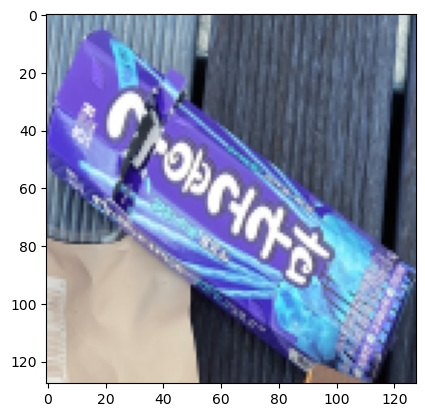

In [210]:
plt.imshow(picture[0])
plt.show()

In [221]:
label[1] # C_1 : 종이

'c_1'

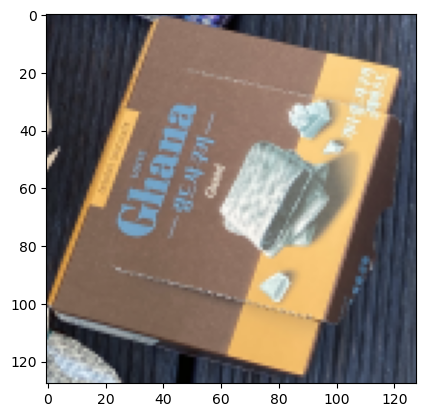

In [211]:
plt.imshow(picture[1])
plt.show()

In [212]:
json_list = list(os.listdir("./03.Sample_Data/2.Label_data/2.indoor_sorter/"))
json_list2 = list(os.listdir("./03.Sample_Data/1.Raw_data/2.indoor_sorter/"))

file_path = "./03.Sample_Data/2.Label_data/2.indoor_sorter/"
file_path2 = "./03.Sample_Data/1.Raw_data/2.indoor_sorter/"


for num in range(len(json_list)):
    file_path_1 = file_path + json_list[num] + "/"
    file_path_2 = file_path2 + json_list2[num] + "/"
    for path2 in os.listdir(file_path_1):
        path2 = path2.split(".")[0]
        line = file_path_1 + path2 + ".json"
        line2 = file_path_2 + path2 + ".jpg"
        raw_picture = cv2.imread(line2, cv2.IMREAD_COLOR) # cv2의 경우 경로에 한글이 있으면 에러 발생함
        with open(line, encoding='utf-8') as f:
            data = json.load(f)
        
        for num2 in range(len(data["objects"])):
            label.append(data["objects"][num2]["class_name"])
            x_start = int(data["objects"][num2]["annotation"]["coord"]['x'])
            y_start = int(data["objects"][num2]["annotation"]["coord"]['y'])
            x_end = int(data["objects"][num2]["annotation"]["coord"]['width']) + int(data["objects"][num2]["annotation"]["coord"]['x'])
            y_end = int(data["objects"][num2]["annotation"]["coord"]['height']) + int(data["objects"][num2]["annotation"]["coord"]['y'])

            test_picture = raw_picture[y_start:y_end, x_start:x_end] # openCv를 resize를 할 때 [y범위 , x범위]
            test_picture = cv2.resize(test_picture, image_reshape, interpolation=cv2.INTER_AREA)
            picture.append(test_picture)

In [213]:
len(picture), len(label), picture[100].shape, label

(109,
 109,
 (128, 128, 3),
 ['c_1',
  'c_1',
  'c_7',
  'c_7',
  'c_3',
  'c_4_02_01_01',
  'c_5_01',
  'c_4_02_03_01',
  'c_3',
  'c_1',
  'c_5_01',
  'c_6',
  'c_1',
  'c_2_02',
  'c_2_02',
  'c_4_02_01_01',
  'c_6',
  'c_4_02_01_01',
  'c_5_01',
  'c_6',
  'c_6',
  'c_3',
  'c_5_01',
  'c_2_02',
  'c_7',
  'c_7',
  'c_6',
  'c_4_02_03_02',
  'c_5_01_01',
  'c_6',
  'c_5_01_01',
  'c_2_02',
  'c_5_01_01',
  'c_7',
  'c_7',
  'c_1',
  'c_4_02_02_01',
  'c_5_01',
  'c_4_02_03_01',
  'c_5_01',
  'c_2_02',
  'c_4_02_03_01',
  'c_4_02_01_01',
  'c_6',
  'c_4_02_02_01',
  'c_4_02_02_01',
  'c_4_02_02_01',
  'c_4_02_02_01',
  'c_4_02_02_01',
  'c_5_01_01',
  'c_6_01',
  'c_6_01',
  'c_6_01',
  'c_6_01',
  'c_4_02_03_01',
  'c_5_02',
  'c_7',
  'c_4_02_03_01',
  'c_5_02',
  'c_7',
  'c_7',
  'c_4_02_03_01',
  'c_5_01',
  'c_4_02_03_01',
  'c_7',
  'c_5_02',
  'c_5_02',
  'c_7',
  'c_4_02_03_01',
  'c_6',
  'c_6',
  'c_5_01_01',
  'c_5_01_01',
  'c_6',
  'c_7',
  'c_7',
  'c_8_01',
  'c_6',


In [214]:
label[39] # c_5_01 : 페트 + 다중포장재

'c_5_01'

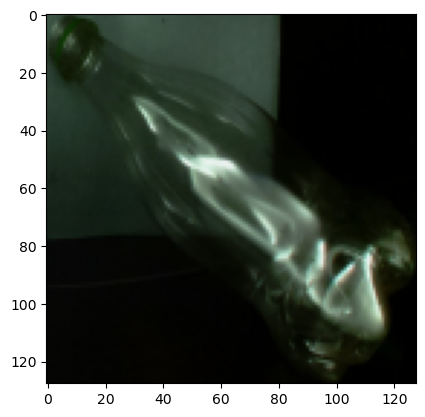

In [215]:
plt.imshow(picture[39])
plt.show()

In [216]:
json_list = list(os.listdir("./03.Sample_Data/2.Label_data/1.recycling_sorting_station/"))
json_list2 = list(os.listdir("./03.Sample_Data/1.Raw_data/1.recycling_sorting_station/"))

file_path = "./03.Sample_Data/2.Label_data/1.recycling_sorting_station/"
file_path2 = "./03.Sample_Data/1.Raw_data/1.recycling_sorting_station/"


for num in range(len(json_list)):
    file_path_1 = file_path + json_list[num] + "/"
    file_path_2 = file_path2 + json_list2[num] + "/"
    for path2 in os.listdir(file_path_1):
        path2 = path2.split(".")[0]
        line = file_path_1 + path2 + ".json"
        line2 = file_path_2 + path2 + ".jpg"
        raw_picture = cv2.imread(line2, cv2.IMREAD_COLOR) # cv2의 경우 경로에 한글이 있으면 에러 발생함
        with open(line, encoding='utf-8') as f:
            data = json.load(f)
        
        for num2 in range(len(data["objects"])):
            label.append(data["objects"][num2]["class_name"])
            x_start = int(data["objects"][num2]["annotation"]["coord"]['x'])
            y_start = int(data["objects"][num2]["annotation"]["coord"]['y'])
            x_end = int(data["objects"][num2]["annotation"]["coord"]['width']) + int(data["objects"][num2]["annotation"]["coord"]['x'])
            y_end = int(data["objects"][num2]["annotation"]["coord"]['height']) + int(data["objects"][num2]["annotation"]["coord"]['y'])

            test_picture = raw_picture[y_start:y_end, x_start:x_end] # openCv를 resize를 할 때 [y범위 , x범위]
            test_picture = cv2.resize(test_picture, image_reshape, interpolation=cv2.INTER_AREA)
            picture.append(test_picture)

In [217]:
len(picture), len(label), picture[109].shape, label

(391,
 391,
 (128, 128, 3),
 ['c_1',
  'c_1',
  'c_7',
  'c_7',
  'c_3',
  'c_4_02_01_01',
  'c_5_01',
  'c_4_02_03_01',
  'c_3',
  'c_1',
  'c_5_01',
  'c_6',
  'c_1',
  'c_2_02',
  'c_2_02',
  'c_4_02_01_01',
  'c_6',
  'c_4_02_01_01',
  'c_5_01',
  'c_6',
  'c_6',
  'c_3',
  'c_5_01',
  'c_2_02',
  'c_7',
  'c_7',
  'c_6',
  'c_4_02_03_02',
  'c_5_01_01',
  'c_6',
  'c_5_01_01',
  'c_2_02',
  'c_5_01_01',
  'c_7',
  'c_7',
  'c_1',
  'c_4_02_02_01',
  'c_5_01',
  'c_4_02_03_01',
  'c_5_01',
  'c_2_02',
  'c_4_02_03_01',
  'c_4_02_01_01',
  'c_6',
  'c_4_02_02_01',
  'c_4_02_02_01',
  'c_4_02_02_01',
  'c_4_02_02_01',
  'c_4_02_02_01',
  'c_5_01_01',
  'c_6_01',
  'c_6_01',
  'c_6_01',
  'c_6_01',
  'c_4_02_03_01',
  'c_5_02',
  'c_7',
  'c_4_02_03_01',
  'c_5_02',
  'c_7',
  'c_7',
  'c_4_02_03_01',
  'c_5_01',
  'c_4_02_03_01',
  'c_7',
  'c_5_02',
  'c_5_02',
  'c_7',
  'c_4_02_03_01',
  'c_6',
  'c_6',
  'c_5_01_01',
  'c_5_01_01',
  'c_6',
  'c_7',
  'c_7',
  'c_8_01',
  'c_6',


In [218]:
label[109] # c_6_01 : 플라스틱 + 이물질

'c_6_01'

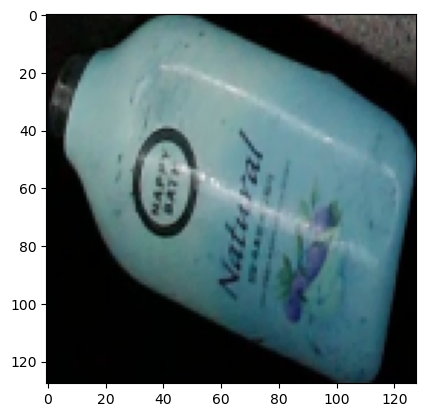

In [219]:
plt.imshow(picture[109])
plt.show()